In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'../Energy_Consumption_by_Sector_monthly.csv')

In [5]:
df.columns

Index(['Month', 'Primary Energy Consumed by the Residential Sector',
       'Total Energy Consumed by the Residential Sector',
       'Primary Energy Consumed by the Commercial Sector',
       'Total Energy Consumed by the Commercial Sector',
       'Primary Energy Consumed by the Industrial Sector',
       'Total Energy Consumed by the Industrial Sector',
       'Primary Energy Consumed by the Transportation Sector',
       'Total Energy Consumed by the Transportation Sector',
       'Primary Energy Consumed by the Electric Power Sector',
       'Energy Consumption Balancing Item',
       'Primary Energy Consumption Total'],
      dtype='object')

##### Picking only Monthly data for transformation

In [6]:
df = df[['Month', 'Total Energy Consumed by the Residential Sector']]

In [7]:
df.Month.isnull().sum()

1

In [8]:
df = df.drop([0,0])
df = df.dropna()

In [9]:
df.Month.isnull().sum()

0

In [10]:
df['Month'] = pd.to_datetime(df.Month)

df['Data'] = df['Total Energy Consumed by the Residential Sector'].astype(float)


In [11]:
month_wise_consumption = df.groupby(['Month'])['Data'].sum().reset_index()

month_wise_consumption.set_index('Month', inplace=True)
month_wise_consumption

,Data
Month,
1973-01-01,1957.641
1973-02-01,1712.143
1973-03-01,1510.079
1973-04-01,1183.421
1973-05-01,1006.326
...,...
2019-11-01,1811.487
2019-12-01,2172.491
2020-01-01,2247.496


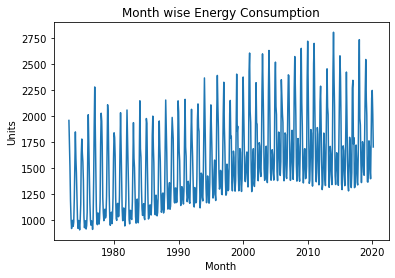

In [12]:
plt.xlabel("Month")
plt.ylabel("Units")
plt.title("Month wise Energy Consumption")
plt.plot(month_wise_consumption)

In [13]:
df['MonthName'] = pd.DatetimeIndex(df.Month).month
df['Year'] = pd.DatetimeIndex(df.Month).year
df.head()

,Month,Total Energy Consumed by the Residential Sector,Data,MonthName,Year
1,1973-01-01,1957.641,1957.641,1,1973
2,1973-02-01,1712.143,1712.143,2,1973
3,1973-03-01,1510.079,1510.079,3,1973
4,1973-04-01,1183.421,1183.421,4,1973
5,1973-05-01,1006.326,1006.326,5,1973


In [14]:
monthly_consumption = df.groupby(['MonthName'])['Data'].sum().reset_index()

monthly_consumption.set_index('MonthName', inplace=True)
monthly_consumption

,Data
MonthName,
1,108960.133
2,93241.240
3,83463.806
4,63317.885
5,56638.150
6,59728.661
7,68522.764
8,67821.203
9,58261.917


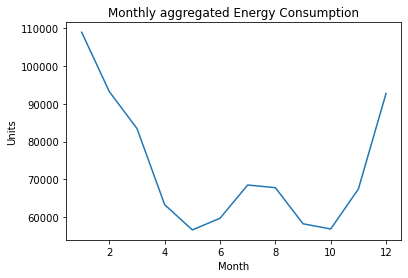

In [15]:
plt.xlabel("Month")
plt.ylabel("Units")
plt.title("Monthly aggregated Energy Consumption")
plt.plot(monthly_consumption)

In [16]:
yearly_consumption = df.groupby(['Year'])['Data'].sum().reset_index()
yearly_consumption.set_index('Year', inplace=True)
yearly_consumption.tail()

,Data
Year,
2016,20184.035
2017,19886.092
2018,21502.069
2019,21210.302
2020,5968.638


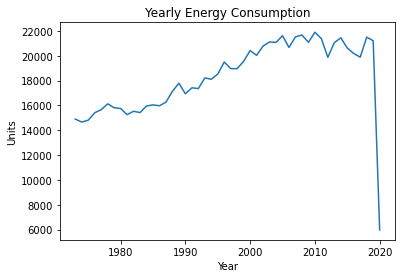

In [17]:
plt.xlabel("Year")
plt.ylabel("Units")
plt.title("Yearly Energy Consumption")
plt.plot(yearly_consumption)

In [18]:
from sklearn import datasets

In [19]:
winedata, winetgt = datasets.load_wine(return_X_y=True, as_frame=True)
winedata.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [20]:
def statsInfo(data, n=3):
    i = 0
    for item in data.columns:
        if i > n:
            break
        print(item, "\n\tmean:",data[item].mean(), "\n\tmin:", data[item].min(), "\n\tmax:", data[item].max())
        i+=1
statsInfo(winedata,1)

alcohol 
	mean: 13.000617977528083 
	min: 11.03 
	max: 14.83
malic_acid 
	mean: 2.336348314606741 
	min: 0.74 
	max: 5.8


### MinMaxScaler

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
mms = MinMaxScaler()
wdnorm = mms.fit_transform(winedata)

In [23]:
wdscaled = pd.DataFrame(wdnorm, index=winedata.index, columns=winedata.columns)
wdscaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [24]:
statsInfo(wdscaled, 1)

alcohol 
	mean: 0.5185836782968661 
	min: 0.0 
	max: 1.0
malic_acid 
	mean: 0.3154838566416486 
	min: 0.0 
	max: 1.0


### StandardScaler

In [25]:
from sklearn.preprocessing import StandardScaler

In [27]:
standerScaler = StandardScaler()
wineDataStandardNorm = standerScaler.fit_transform(winedata)

In [28]:
wineDataStandardScaled = pd.DataFrame(wineDataStandardNorm, index=winedata.index, columns=winedata.columns)
statsInfo(wineDataStandardScaled)

alcohol 
	mean: -8.619821460853744e-16 
	min: -2.4342353470856977 
	max: 2.2597715200031785
malic_acid 
	mean: -8.357858724706234e-17 
	min: -1.4329830495567168 
	max: 3.1091924671589037
ash 
	mean: -8.657244708874816e-16 
	min: -3.6791622340370105 
	max: 3.156325269990446
alcalinity_of_ash 
	mean: -1.1601206886532536e-16 
	min: -2.6710181364687173 
	max: 3.1545107139410433


(-2.6689356904401413,
 2.494471863357622,
 -1.6600918253924979,
 3.3363012429946846)

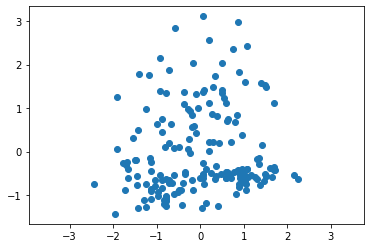

In [29]:
plt.scatter(wineDataStandardNorm[:, 0],wineDataStandardNorm[:,1])
plt.axis('equal')

In [30]:
# Other way to convert the scaler output to dataframe
# import pandas as pd    
# from sklearn.preprocessing import StandardScaler

# df = pd.read_csv('your file here')
# ss = StandardScaler()
# df_scaled = pd.DataFrame(ss.fit_transform(df),columns = df.columns)

### Standardization PCA

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)

In [36]:
wineDataPca = pca.fit_transform(wineDataStandardNorm)
pca.explained_variance_ratio_.sum()

0.9201754434577263

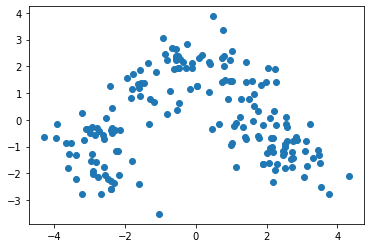

In [38]:
plt.scatter(wineDataPca[:,0],wineDataPca[:,1])

## PCA dimensionality reduction:
#### The Dimensions can be reduced to 8 while capturing 90% variance in the data

In [39]:
pca.explained_variance_ratio_.sum()

0.9201754434577263